# Tenglo Channel Experimnt
# Towed ADCP - track
GS rev 17.Jun.2025

In [1]:
import os
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pickle

import rasterio
from rasterio.plot import show

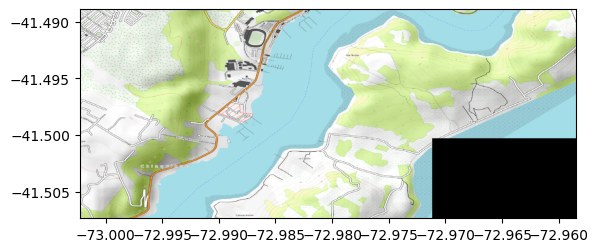

<Axes: >

In [2]:
map_path = r'd:\GUTO\1_Trabs\1_Aestus\ChileTengloChannel\Base_Geografica\\'

basemap = rasterio.open(map_path + 'recorte_TengloChannel.tif')

show(basemap)

In [3]:
adcp_path = r'd:\GUTO\1_Trabs\1_Aestus\ChileTengloChannel\ADCP\\'

adcp_dir = os.listdir(adcp_path)

ascfiles = []
for f in adcp_dir:
    if f.endswith('TXT'):
        ascfiles.append(f)

In [4]:
for f in ascfiles:
    print(f)

Tenglo2_0_000_23-12-12_080249_output_ascii_20230818_ASC.TXT
Tenglo2_0_001_23-12-12_105340_output_ascii_20230818_ASC.TXT
Tenglo4_0_000_23-12-12_180512_output_ascii_20230818_ASC.TXT


In [5]:
def esmurruga(lines):
    latitude = []
    longitude = []
    depth = []
    time = []
    vel_u = []
    vel_v = []
    abs = [] # acoustic backscatter --> for data quality check, and for those who like suspende sediment stuff...

    for d in lines: # first row is garbage 
        dq = d.split() # break the line
        time.append(mdates.num2date(float(dq[1])/(24*3600)))   # from the user guide... seconds from 1/1/1970
        longitude.append(float(dq[2]))
        latitude.append(float(dq[3]))
        depth.append(float(dq[4]))

        # the 'broken' items with more than on element are 'list' objects!
        levels = [float(x) for x in dq[8].split(',')] # distance from the transducer

        g_abs = [float(x) for x in dq[9].split(',')] 
        g_vel_u = [float(x) for x in dq[10].split(',')]
        g_vel_v = [float(x) for x in dq[11].split(',')]

        abs.append(g_abs)
        vel_u.append(g_vel_u)
        vel_v.append(g_vel_v)

    # convert list to numpy array (slicebles...)
    time = np.array(time)
    longitude = np.array(longitude)
    latitude = np.array(latitude)
    depth = np.array(depth)
    levels = np.array(levels)
    abs = np.array(abs)
    vel_u = np.array(vel_u)
    vel_v = np.array(vel_v)

    # replacing the 'bad' data for np.nan
    depth[depth == -32768] = np.nan
    abs[abs == -32768] = np.nan
    vel_u[vel_u == -32768] = np.nan
    vel_v[vel_v == -32768] = np.nan
    longitude[longitude ==  -32768] = np.nan
    latitude[latitude ==  -32768] = np.nan
    
    join = [time, longitude, latitude, depth, levels, abs, vel_u, vel_v]
    
    return join

In [6]:
time = np.array([])
longitude = np.array([])
latitude = np.array([])
depth = np.array([])
abs = np.zeros((1, 60))
vel_u = np.zeros((1, 60))
vel_v = np.zeros((1, 60))

for f in ascfiles:
    with open(adcp_path + f) as io:
        lines = io.readlines()
    
    data = esmurruga(lines)
        
    time = np.concatenate((time, data[0]))
    longitude = np.concatenate((longitude, data[1]))
    latitude = np.concatenate((latitude, data[2]))
    depth = np.concatenate((depth, data[3]))
    abs = np.vstack((abs, data[4]))
    vel_u = np.vstack((vel_u, data[5]))
    vel_v = np.vstack((vel_v, data[6]))

NameError: name 'ini' is not defined

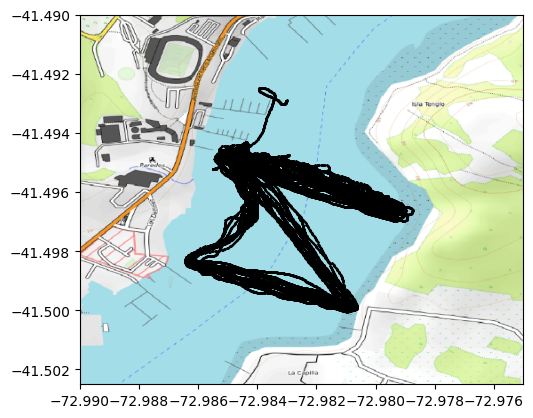

In [7]:
fig, ax = plt.subplots()

ax.plot(longitude, latitude, 'k.', ms=1)

ax.set_xlim(-72.99, -72.975)
ax.set_ylim(-41.5025, -41.49)

show(basemap, ax=ax)

print(time[ini], time[fim])


In [ ]:
time[0]

In [ ]:
plt.plot(time[1500:3500], longitude[1500:3500])

In [ ]:
j = [time, longitude, latitude]
with open('ADCP_txy.pkl', 'wb') as io:
    pickle.dump(j, io)